<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_12_features/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод главных компонент (Principal Components Analysis, PCA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

RANDOM_STATE = 42

Загружаем данные

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(data=diabetes.data,
                  columns=diabetes.feature_names)

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Применяем PCA

Внутри метода данные уже центрированы

In [ ]:
pca = PCA(n_components=10)

pca.fit_transform(df)

array([[ 0.02793021, -0.09260136,  0.02802565, ...,  0.03602731,
        -0.00861288, -0.00232845],
       [-0.13468668,  0.06526327,  0.00132849, ..., -0.008963  ,
         0.02402649,  0.00207377],
       [ 0.01294384, -0.07776432,  0.03516224, ...,  0.04010708,
        -0.00120593, -0.00257685],
       ...,
       [-0.00976067, -0.05733918,  0.02360117, ..., -0.02339486,
        -0.00538535,  0.00280039],
       [ 0.03295652,  0.00999473, -0.04132099, ...,  0.0037426 ,
        -0.00605083, -0.00216612],
       [-0.09056122,  0.18910841, -0.0022992 , ...,  0.0563818 ,
         0.03474513, -0.00735156]])

Вычисляем долю объясненной дисперсии

In [ ]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [ ]:
prop_var

array([0.40242108, 0.14923197, 0.12059663, 0.09554764, 0.06621814,
       0.06027171, 0.05365657, 0.0433682 , 0.007832  , 0.00085607])

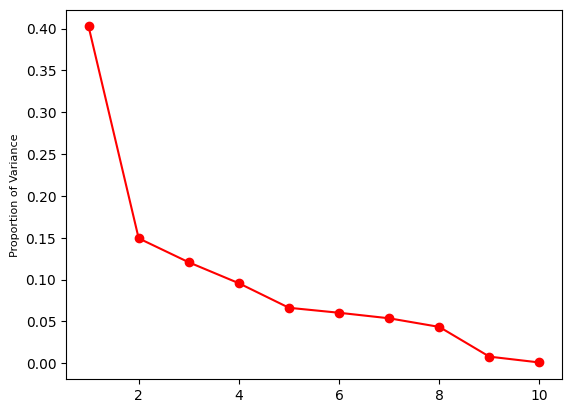

In [ ]:
PC_numbers = np.arange(pca.n_components_) + 1

plt.plot(PC_numbers,
         prop_var,
         'ro-')
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

PCA для дальнейших задач

In [ ]:
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

pca = PCA(n_components=5)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [ ]:
X_train.shape, X_train_reduced.shape

((331, 10), (331, 5))